In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score,classification_report
from sklearn.preprocessing import StandardScaler

from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering, SpectralClustering
from sklearn.metrics import (
    silhouette_score, calinski_harabasz_score, davies_bouldin_score,
    normalized_mutual_info_score, adjusted_rand_score,
    adjusted_mutual_info_score, v_measure_score,
    completeness_score, homogeneity_score
)



In [ ]:
df = pd.read_csv('train.csv')


In [ ]:
df

,ID,Loan Amount,Funded Amount,Funded Amount Investor,Term,Batch Enrolled,Interest Rate,Grade,Sub Grade,Employment Duration,...,Recoveries,Collection Recovery Fee,Collection 12 months Medical,Application Type,Last week Pay,Accounts Delinquent,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit,Loan Status
0,65087372,10000,32236,12329.36286,59,BAT2522922,11.135007,B,C4,MORTGAGE,...,2.498291,0.793724,0,INDIVIDUAL,49,0,31,311301,6619,0
1,1450153,3609,11940,12191.99692,59,BAT1586599,12.237563,C,D3,RENT,...,2.377215,0.974821,0,INDIVIDUAL,109,0,53,182610,20885,0
2,1969101,28276,9311,21603.22455,59,BAT2136391,12.545884,F,D4,MORTGAGE,...,4.316277,1.020075,0,INDIVIDUAL,66,0,34,89801,26155,0
3,6651430,11170,6954,17877.15585,59,BAT2428731,16.731201,C,C3,MORTGAGE,...,0.107020,0.749971,0,INDIVIDUAL,39,0,40,9189,60214,0
4,14354669,16890,13226,13539.92667,59,BAT5341619,15.008300,C,D4,MORTGAGE,...,1294.818751,0.368953,0,INDIVIDUAL,18,0,430,126029,22579,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67458,16164945,13601,6848,13175.28583,59,BAT3193689,9.408858,C,A4,MORTGAGE,...,564.614852,0.865230,0,INDIVIDUAL,69,0,48,181775,34301,1
67459,35182714,8323,11046,15637.46301,59,BAT1780517,9.972104,C,B3,RENT,...,2.015494,1.403368,0,INDIVIDUAL,14,0,37,22692,8714,0
67460,16435904,15897,32921,12329.45775,59,BAT1761981,19.650943,A,F3,MORTGAGE,...,5.673092,1.607093,0,INDIVIDUAL,137,0,17,176857,42330,0
67461,5300325,16567,4975,21353.68465,59,BAT2333412,13.169095,D,E3,OWN,...,1.157454,0.207608,0,INDIVIDUAL,73,0,61,361339,39075,0


In [ ]:
counts = df['Loan Status'].value_counts()

print(counts)

0    61222
1     6241
Name: Loan Status, dtype: int64


In [ ]:
# UNDERSAMPLING CODE
# df_class_0 = df[df['Loan Status'] == 0]
# df_class_1 = df[df['Loan Status'] == 1]

# # Undersample the majority class (0 in this case)
# df_class_0_under = df_class_0.sample(n=6241, random_state=42)  # random_state for reproducibility

# # Concatenate both dataframes to get a balanced dataset
# df_balanced = pd.concat([df_class_0_under, df_class_1], axis=0)

# # Shuffle the rows so that they are mixed
# df_balanced = df_balanced.sample(frac=1, random_state=42).reset_index(drop=True)

# print(df_balanced['Loan Status'].value_counts())


In [ ]:
# OVERSAMPLING CODE
# df_class_0 = df[df['Loan Status'] == 0]
# df_class_1 = df[df['Loan Status'] == 1]

# # Oversample the minority class (1 in this case)
# df_class_1_over = df_class_1.sample(n=len(df_class_0), replace=True, random_state=42)  # random_state for reproducibility

# # Concatenate both dataframes to get a balanced dataset
# df_balanced = pd.concat([df_class_0, df_class_1_over], axis=0)

# # Shuffle the rows so that they are mixed
# df_balanced = df_balanced.sample(frac=1, random_state=42).reset_index(drop=True)

# print(df_balanced['Loan Status'].value_counts())


In [ ]:
columns_to_remove = ['Collection 12 months Medical', 'Recoveries', 'ID', 'Total Accounts','Funded Amount', 'Accounts Delinquent', 'Payment Plan']  # replace with the names of columns you want to remove

df = df.drop(columns=columns_to_remove)

df.head(2)

,Loan Amount,Funded Amount Investor,Term,Batch Enrolled,Interest Rate,Grade,Sub Grade,Employment Duration,Home Ownership,Verification Status,...,Initial List Status,Total Received Interest,Total Received Late Fee,Collection Recovery Fee,Application Type,Last week Pay,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit,Loan Status
0,10000,12329.36286,59,BAT2522922,11.135007,B,C4,MORTGAGE,176346.6267,Not Verified,...,w,2929.646315,0.102055,0.793724,INDIVIDUAL,49,31,311301,6619,0
1,3609,12191.99692,59,BAT1586599,12.237563,C,D3,RENT,39833.9210,Source Verified,...,f,772.769385,0.036181,0.974821,INDIVIDUAL,109,53,182610,20885,0


In [ ]:

from sklearn import preprocessing
le = preprocessing.LabelEncoder()

for i in df.columns:
    df[i] = le.fit_transform(df[i])

In [ ]:
for i in df.columns:

    df[i] = df[i].fillna(df[i].mean())

In [ ]:
df.head(2)

,Loan Amount,Funded Amount Investor,Term,Batch Enrolled,Interest Rate,Grade,Sub Grade,Employment Duration,Home Ownership,Verification Status,...,Initial List Status,Total Received Interest,Total Received Late Fee,Collection Recovery Fee,Application Type,Last week Pay,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit,Loan Status
0,7094,31227,2,16,31671,1,13,0,64573,0,...,1,52952,60456,34487,0,49,30,51921,5050,0
1,1334,30466,2,4,40163,2,17,2,6992,1,...,0,21853,28602,45192,0,109,52,38407,16786,0


# Correlation Heatmap

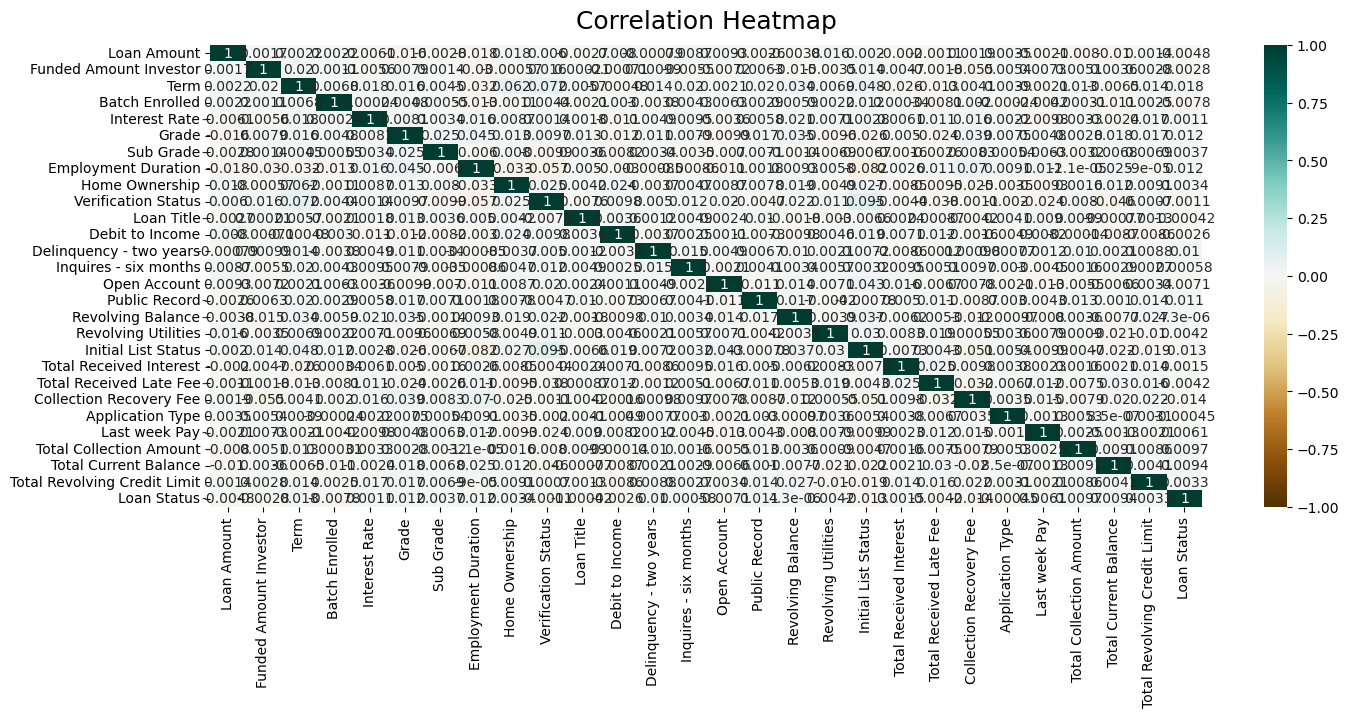

In [ ]:
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12);
plt.show()

In [ ]:
X = df.iloc[:, :-1]
y = df['Loan Status']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10)

# Decision Tree

[[5415  674]
 [ 577   81]]


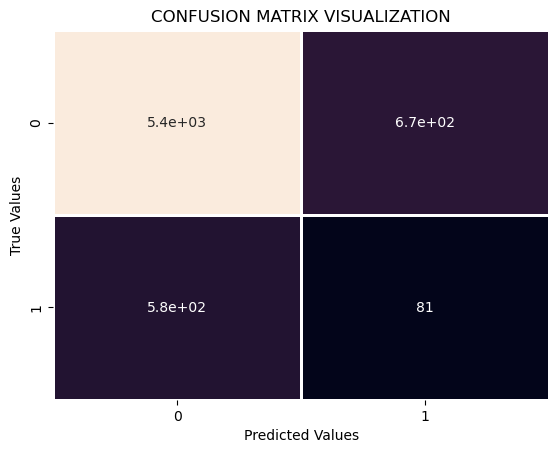

In [ ]:
model1 = DecisionTreeClassifier()

model1.fit(X_train,y_train)
y_pred = model1.predict(X_test)


conf = confusion_matrix(y_test,y_pred)
print(conf)
sns.heatmap(confusion_matrix(y_test, y_pred),annot=True,lw =2,cbar=False)
plt.ylabel("True Values")
plt.xlabel("Predicted Values")
plt.title("CONFUSION MATRIX VISUALIZATION")
plt.show()

In [ ]:

TN = conf[0][0]
FP = conf[0][1]
FN = conf[1][0]
TP = conf[1][1]

accuracy = (TP + TN) / (TP + TN + FP + FN)
precision = TP / (TP + FP) if TP + FP != 0 else 0
recall = TP / (TP + FN) if TP + FN != 0 else 0


print(f"Accuracy: {accuracy*100:.2f}%")
print(f"Precision: {precision*100:.2f}%")
print(f"Recall: {recall*100:.2f}%")


Accuracy: 81.46%
Precision: 10.73%
Recall: 12.31%


In [ ]:
res = classification_report(y_test,y_pred)
print(res)

              precision    recall  f1-score   support

           0       0.90      0.89      0.90      6089
           1       0.11      0.12      0.11       658

    accuracy                           0.81      6747
   macro avg       0.51      0.51      0.51      6747
weighted avg       0.83      0.81      0.82      6747



# Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report


In [ ]:
logistic_reg = LogisticRegression(random_state=42)
logistic_reg.fit(X_train, y_train)

# Make predictions
y_pred = logistic_reg.predict(X_test)

# Evaluate the model using various metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Print the evaluation metrics
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(classification_rep)

Accuracy: 0.90
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Confusion Matrix:
[[6089    0]
 [ 658    0]]
Classification Report:
              precision    recall  f1-score   support

           0       0.90      1.00      0.95      6089
           1       0.00      0.00      0.00       658

    accuracy                           0.90      6747
   macro avg       0.45      0.50      0.47      6747
weighted avg       0.81      0.90      0.86      6747



/Users/ibraheem/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/ibraheem/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/ibraheem/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined a

# Supervised Learning Models

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_curve,auc
from sklearn.metrics import roc_auc_score


In [ ]:

models = [
    LogisticRegression(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    GaussianNB()
]

In [ ]:
# Iterate through models and evaluate their performance
for model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    classification_rep = classification_report(y_test, y_pred)

    # Print or store the evaluation metrics for each model
    print(f"Model: {model.__class__.__name__}")
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 Score: {f1:.2f}")
    print(f"ROC-AUC: {roc_auc:.2f}")
    print("Confusion Matrix:")
    print(conf_matrix)
    print("Classification Report:")
    print(classification_rep)
    print("\n")

/Users/ibraheem/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/ibraheem/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/ibraheem/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined a

Model: LogisticRegression
Accuracy: 0.90
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
ROC-AUC: 0.50
Confusion Matrix:
[[6089    0]
 [ 658    0]]
Classification Report:
              precision    recall  f1-score   support

           0       0.90      1.00      0.95      6089
           1       0.00      0.00      0.00       658

    accuracy                           0.90      6747
   macro avg       0.45      0.50      0.47      6747
weighted avg       0.81      0.90      0.86      6747



Model: DecisionTreeClassifier
Accuracy: 0.81
Precision: 0.09
Recall: 0.10
F1 Score: 0.09
ROC-AUC: 0.49
Confusion Matrix:
[[5409  680]
 [ 592   66]]
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.89      0.89      6089
           1       0.09      0.10      0.09       658

    accuracy                           0.81      6747
   macro avg       0.49      0.49      0.49      6747
weighted avg       0.82      0.81      0.82      6747



Mode

/Users/ibraheem/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/ibraheem/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/ibraheem/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/ibraheem/opt/anaconda3/l

/Users/ibraheem/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


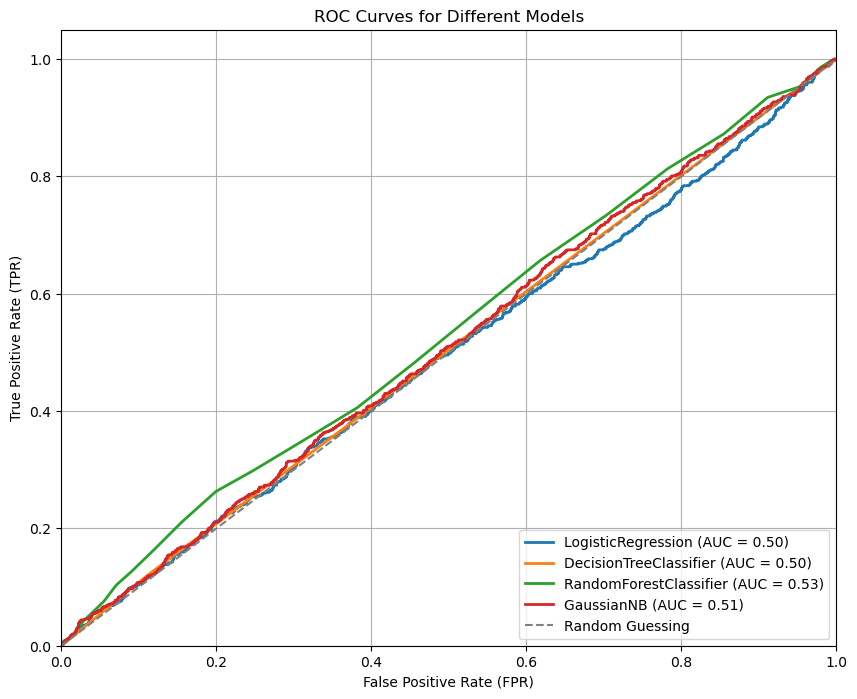

In [ ]:
roc_data = {}

# Plot ROC curves for each model
plt.figure(figsize=(10, 8))

for model in models:
    model_name = model.__class__.__name__

    # Fit the model
    model.fit(X_train, y_train)

    # Check if the model supports predict_proba
    if hasattr(model, "predict_proba"):
        # Get predicted probabilities for positive class
        y_pred_prob = model.predict_proba(X_test)[:, 1]
    else:
        # For models without predict_proba, use decision_function or predict directly
        if hasattr(model, "decision_function"):
            y_pred_prob = model.decision_function(X_test)
        else:
            y_pred_prob = model.predict(X_test)

    # Compute ROC curve and AUC
    fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
    roc_auc = auc(fpr, tpr)

    # Store ROC curve data
    roc_data[model_name] = {'fpr': fpr, 'tpr': tpr, 'roc_auc': roc_auc}

    # Plot ROC curve
    plt.plot(fpr, tpr, lw=2, label=f'{model_name} (AUC = {roc_auc:.2f})')

# Plot the ROC curve for random guessing (chance)
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Guessing')

# Customize the plot
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curves for Different Models')
plt.legend(loc='lower right')
plt.grid(True)

# Show the plot
plt.show()

# Unsupervised Learning Models

In [ ]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

In [ ]:
scaled_data

array([[-0.83195766, -0.12802626,  0.70807424, ...,  1.28029582,
        -0.99906753, -0.31928119],
       [-1.62860136, -0.16711803,  0.70807424, ...,  0.51009716,
         0.11846994, -0.31928119],
       [ 1.3140013 ,  1.12065039,  0.70807424, ..., -0.32621297,
         0.44984608, -0.31928119],
       ...,
       [-0.08206146, -0.12797489,  0.70807424, ...,  0.45977265,
         1.27800076, -0.31928119],
       [ 0.00839079,  1.08905848,  0.70807424, ...,  1.44454864,
         1.13983215, -0.31928119],
       [-0.15647019,  0.32761641,  0.70807424, ...,  0.62955375,
         1.83905485, -0.31928119]])

In [ ]:
kmeans = KMeans(n_clusters=2)
kmeans


KMeans(n_clusters=2)

In [ ]:
labels = kmeans.fit_predict(scaled_data)
labels

array([1, 0, 1, ..., 1, 0, 0], dtype=int32)

### Evaluation Metrics of K-means

In [ ]:
 silhouette = silhouette_score(scaled_data, labels)
calinski_harabasz = calinski_harabasz_score(scaled_data, labels)
davies_bouldin = davies_bouldin_score(scaled_data, labels)
normalized_mutual_info = normalized_mutual_info_score(df['Loan Status'].values, labels)
adjusted_rand = adjusted_rand_score(df['Loan Status'].values, labels)
adjusted_mutual_info = adjusted_mutual_info_score(df['Loan Status'].values, labels)
v_measure = v_measure_score(df['Loan Status'].values, labels)
completeness = completeness_score(df['Loan Status'].values, labels)
homogeneity = homogeneity_score(df['Loan Status'].values, labels)


print(f"Silhouette Score: {silhouette:.4f}")
print(f"Calinski-Harabasz Score: {calinski_harabasz:.4f}")
print(f"Davies-Bouldin Score: {davies_bouldin:.4f}")
print(f"Normalized Mutual Info: {normalized_mutual_info:.4f}")
print(f"Adjusted Rand Index: {adjusted_rand:.4f}")
print(f"Adjusted Mutual Info: {adjusted_mutual_info:.4f}")
print(f"V-Measure: {v_measure:.4f}")
print(f"Completeness Score: {completeness:.4f}")
print(f"Homogeneity Score: {homogeneity:.4f}")

Silhouette Score: 0.0404
Calinski-Harabasz Score: 2571.9736
Davies-Bouldin Score: 4.9376
Normalized Mutual Info: 0.0002
Adjusted Rand Index: 0.0010
Adjusted Mutual Info: 0.0002
V-Measure: 0.0002
Completeness Score: 0.0001
Homogeneity Score: 0.0003


In [ ]:
from sklearn.metrics import (
    silhouette_score, calinski_harabasz_score, davies_bouldin_score,
    normalized_mutual_info_score, adjusted_rand_score,
    adjusted_mutual_info_score, v_measure_score,
    completeness_score, homogeneity_score
)

# Define a function to evaluate clustering metrics for a given model
def evaluate_clustering_metrics(model, data, scaled_data):
    labels = model.fit_predict(scaled_data)
    evaluation_metricsx = {
        'Silhouette Score': silhouette_score(scaled_data, labels),
        'Calinski-Harabasz Score': calinski_harabasz_score(scaled_data, labels),
        'Davies-Bouldin Score': davies_bouldin_score(scaled_data, labels),
        'Normalized Mutual Info': normalized_mutual_info_score(df['Loan Status'].values, labels),
        'Adjusted Rand Index': adjusted_rand_score(df['Loan Status'].values, labels),
        'Adjusted Mutual Info': adjusted_mutual_info_score(df['Loan Status'].values, labels),
        'V-Measure': v_measure_score(df['Loan Status'].values, labels),
        'Completeness Score': completeness_score(df['Loan Status'].values, labels),
        'Homogeneity Score': homogeneity_score(df['Loan Status'].values, labels),
    }
    return evaluation_metricsx

# Initialize a list to store clustering models
clustering_models = [
     KMeans(n_clusters=2),

    #AgglomerativeClustering(n_clusters=2)



]

lx =[]
# Loop through all clustering models and evaluate metrics
for model in clustering_models:
    d = []
    print(f"Model: {model.__class__.__name__}")
    metrics = evaluate_clustering_metrics(model, df, scaled_data)
    for metric_name, score in metrics.items():
        print(f"{metric_name}: {score:.4f}")
        d.append(score)
    lx.append(d)
    print()

Model: KMeans
Silhouette Score: 0.0404
Calinski-Harabasz Score: 2571.9736
Davies-Bouldin Score: 4.9376
Normalized Mutual Info: 0.0002
Adjusted Rand Index: 0.0010
Adjusted Mutual Info: 0.0002
V-Measure: 0.0002
Completeness Score: 0.0001
Homogeneity Score: 0.0003



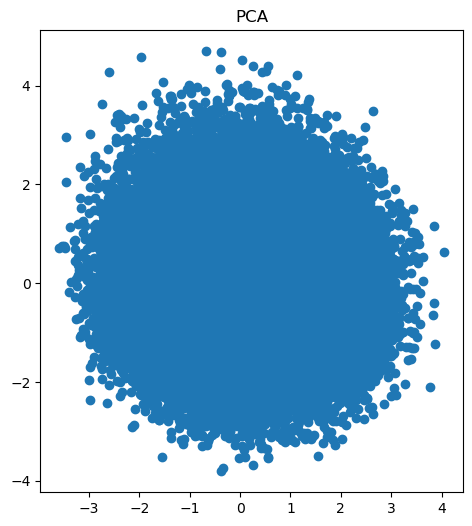

In [ ]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# Apply dimensionality reduction techniques
pca = PCA(n_components=2)
#tsne = TSNE(n_components=2)

pca_result = pca.fit_transform(scaled_data)
#tsne_result = tsne.fit_transform(scaled_data)
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(pca_result[:, 0], pca_result[:, 1])
plt.title("PCA")

# plt.subplot(1, 2, 2)
# plt.scatter(tsne_result[:, 0], tsne_result[:, 1])
# plt.title("t-SNE")

plt.show()